### Exploratory Data Analysis (EDA)

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Overview of the Data

In [2]:
# Load cleaned data
df = pd.read_csv('C:/Users/elbet/OneDrive/Desktop/Ten/week-6/github-notebook/Credit-Scoring-Model-/data/data/cleaned_data.csv')

In [3]:
# Display basic information
print("DataFrame Info:")
display(df.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  Fra

None

In [4]:
# visualize the first few rows
print("\nFirst 5 Rows:")
display(df.head())


First 5 Rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In [5]:
# visualize column names to confirm
print("\nColumn Names:")
display(df.columns.tolist())


Column Names:


['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'CountryCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'Amount',
 'Value',
 'TransactionStartTime',
 'PricingStrategy',
 'FraudResult']

#### Statistics summary

In [6]:
# Summary statistics for numerical features
print("Summary Statistics (Numerical):")
display(df.describe())

Summary Statistics (Numerical):


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [7]:
# Summary statistics for categorical features
print("\nSummary Statistics (Categorical):")
categorical_columns = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId',
                       'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId',
                       'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']

for col in categorical_columns:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())


Summary Statistics (Categorical):

Value Counts for TransactionId:
TransactionId
TransactionId_76871     1
TransactionId_74922     1
TransactionId_2737      1
TransactionId_28101     1
TransactionId_33267     1
                       ..
TransactionId_32860     1
TransactionId_139405    1
TransactionId_65784     1
TransactionId_8889      1
TransactionId_35670     1
Name: count, Length: 95662, dtype: int64

Value Counts for BatchId:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
                  ..
BatchId_23939      1
BatchId_104215     1
BatchId_116411     1
BatchId_36631      1
BatchId_29317      1
Name: count, Length: 94809, dtype: int64

Value Counts for AccountId:
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
                  ...  
AccountId_4180        1
AccountId_63          1
AccountId_3497        1
AccountId_2010        1
Accou

#### Distribution of Numerical Features

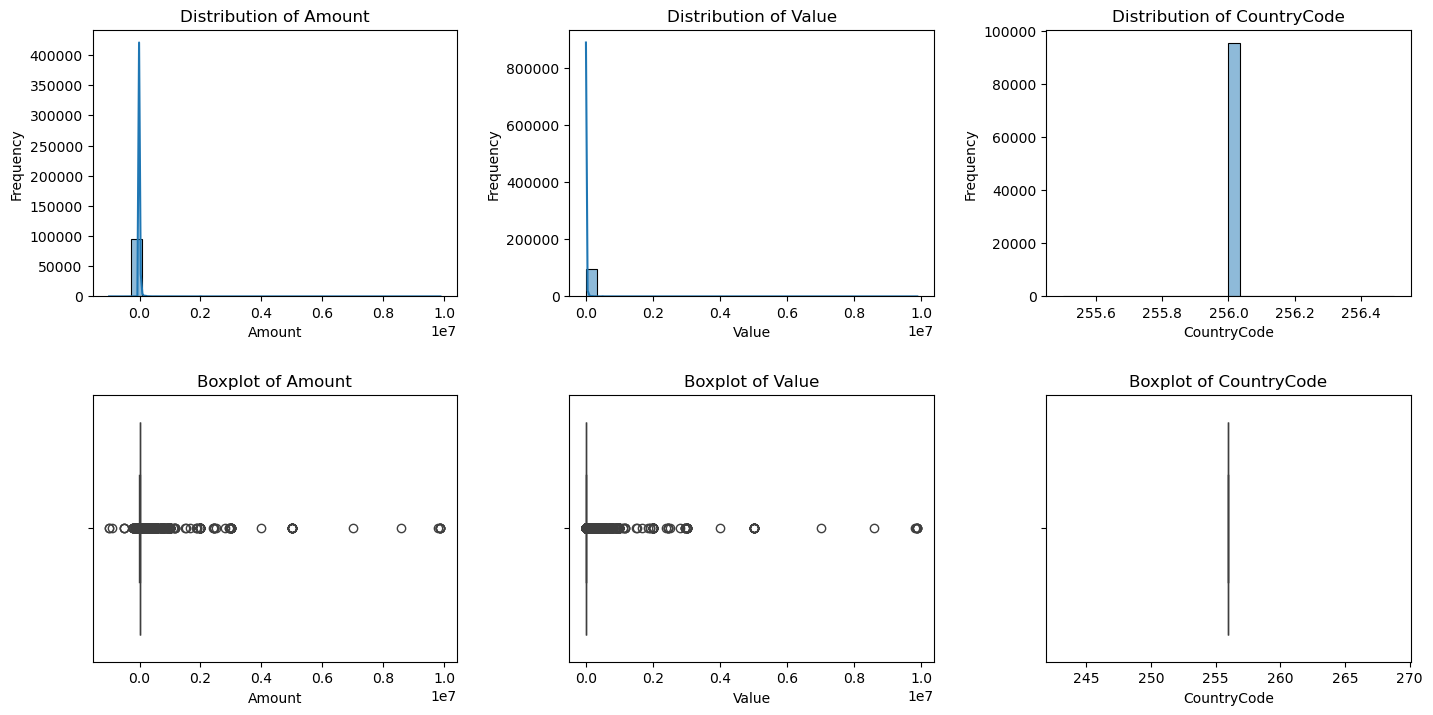

In [8]:
# List of numerical columns
numerical_columns = ['Amount', 'Value', 'CountryCode'] 

fig, axes = plt.subplots(2, len(numerical_columns), figsize=(15, 8))  # 2 rows, len(numerical_columns) columns
fig.tight_layout(pad=5.0) 

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[0, i])
    axes[0, i].set_title(f'Distribution of {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[1, i])
    axes[1, i].set_title(f'Boxplot of {col}')
    axes[1, i].set_xlabel(col)

plt.show()



#### Distribution of Categorical Features

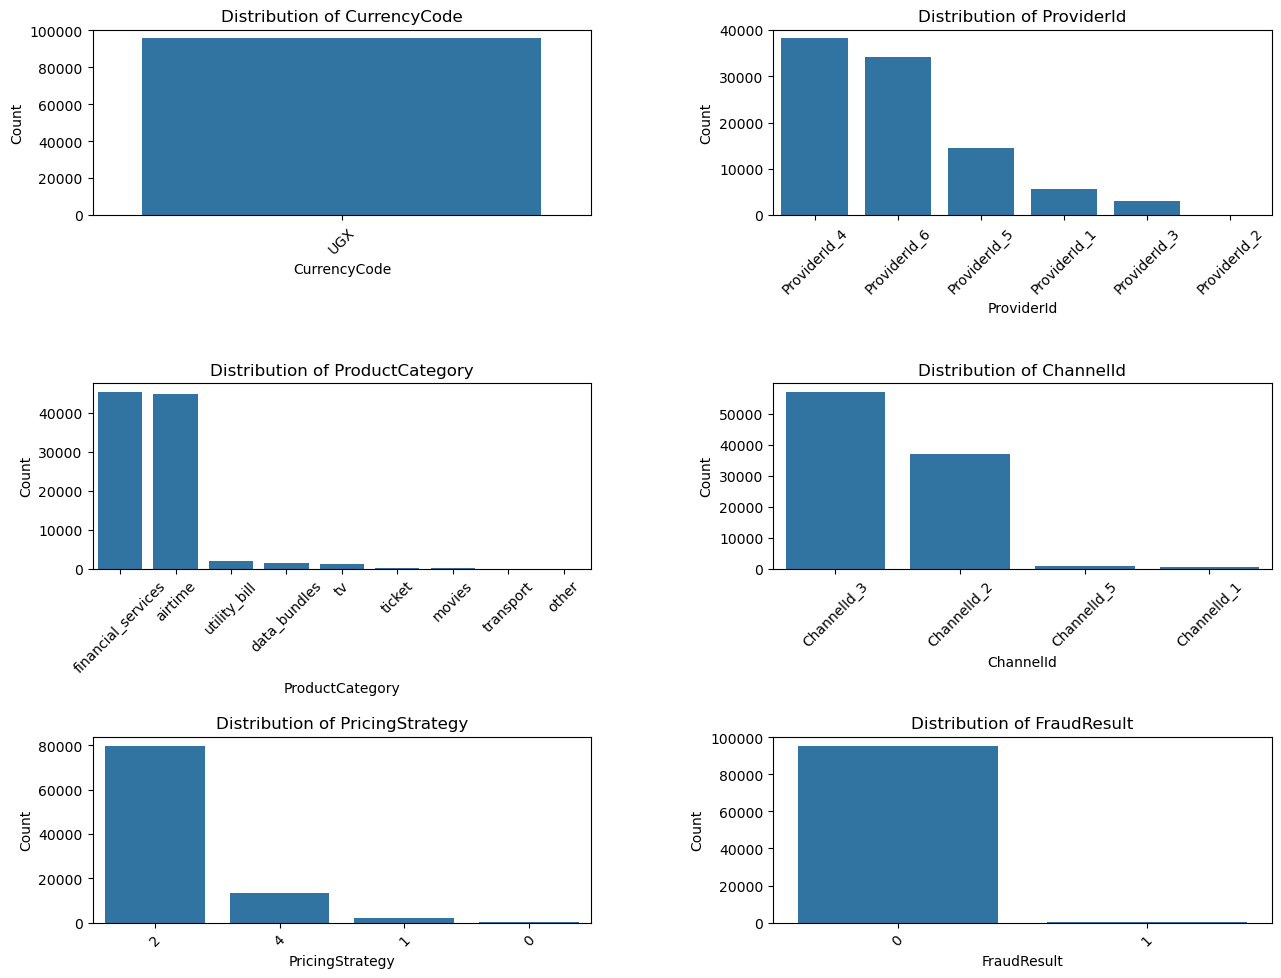

In [10]:
# List of categorical columns excluding identifiers
categorical_columns = ['CurrencyCode', 'ProviderId', 'ProductCategory', 
                       'ChannelId', 'PricingStrategy', 'FraudResult']

n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))  
fig.tight_layout(pad=10.0) 

# Flatten axes array in case of multiple rows
axes = axes.flatten()

# Plot countplots
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


#### Correlation Analysis

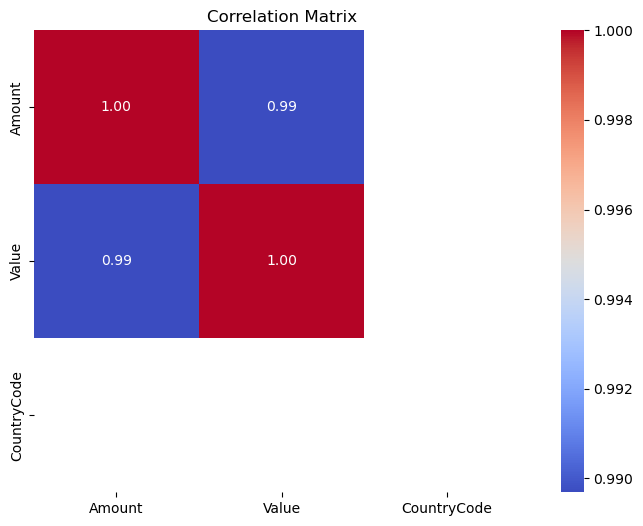

In [11]:
# Compute correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
